In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 심화학습

1. SIR 모형 (전염병 전파 모델)
2. 로트카-볼테라 방정식 (포식자-피식자 모델)

## 1. SIR 모형 (전염병 전파 모델)

- 변수:
  - S(t): 감염 가능한 인구(S, Susceptible)
  - I(t): 감염된 인구(I, Infectious)
  - R(t): 감염 후 회복된 인구(R, Recovered)
- 파라미터:
  - β (beta): 감염율
  - γ (gamma): 회복율
- 방정식:
$$
    \frac{dS}{dt} = -\beta \frac{S I}{N},
    \quad \frac{dI}{dt} = \beta \frac{S I}{N} - \gamma I,
    \quad \frac{dR}{dt} = \gamma I
$$
  (N = S + I + R: 전체 인구 수)

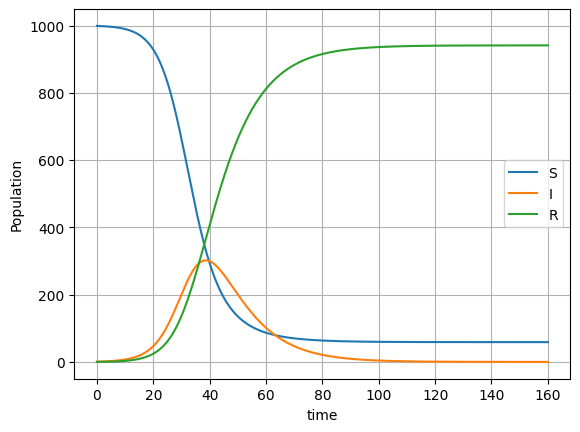

In [2]:
# 초기 조건과 파라미터 설정
N = 1000       # 전체 인구 수
I0 = 1         # 초기 감염자 수
R0 = 0         # 초기 회복자 수
S0 = N - I0 - R0  # 초기 감수성 인구
beta = 0.3     # 전염 전파율
gamma = 0.1    # 회복율

# 시뮬레이션 설정
dt = 0.1       # 시간 간격
t_max = 160    # 시뮬레이션 시간 (일 단위)
steps = int(t_max / dt)

# 결과 저장을 위한 배열 생성
S = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)
t = np.linspace(0, t_max, steps)

# 초기값 저장
S[0], I[0], R[0] = S0, I0, R0

# Euler 방법으로 연립방정식 수치 해 계산
for i in range(steps - 1):
    dSdt = -beta * S[i] * I[i] / N
    dIdt = beta * S[i] * I[i] / N - gamma * I[i]
    dRdt = gamma * I[i]
    S[i+1] = S[i] + dSdt * dt
    I[i+1] = I[i] + dIdt * dt
    R[i+1] = R[i] + dRdt * dt

# 그래프 그리기
plt.figure()
plt.plot(t, S, label='S')
plt.plot(t, I, label='I')
plt.plot(t, R, label='R')
plt.xlabel('time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

**실습1**: 만약 `beta`가 `gamma`와 같거나 작으면 그래프는 어떻게 변경되는가? 이를 실제 전염병 전파에 비유하여 설명하자면 어떻게 말할 수 있을까요?

※ 참고: https://www.asaninst.org/contents/%EC%A0%84%EC%97%BC%EB%B3%91-%EB%AA%A8%EB%8D%B8%EA%B3%BC-covid-19/

----------------------------
## 2. 로트카-볼테라 방정식 (포식자-피식자 모델)

- 변수:
  - x(t): 피식자(예: 토끼) 수
  - y(t): 포식자(예: 여우) 수

- 파라미터:
  - α (alpha): 피식자 번식
  - β (beta): 포식자로 인한 피식자의 죽음
  - δ (delta): 피식자로 인한 포식자의 증가
  - γ (gamma): 포식자 자연사

- 방정식:
$$
    \frac{dx}{dt} = \alpha x - \beta x y,
    \quad \frac{dy}{dt} = \delta x y - \gamma y
$$

※ 참고: https://teaching.smp.uq.edu.au/scims/Appl_analysis/Lotka_Volterra.html

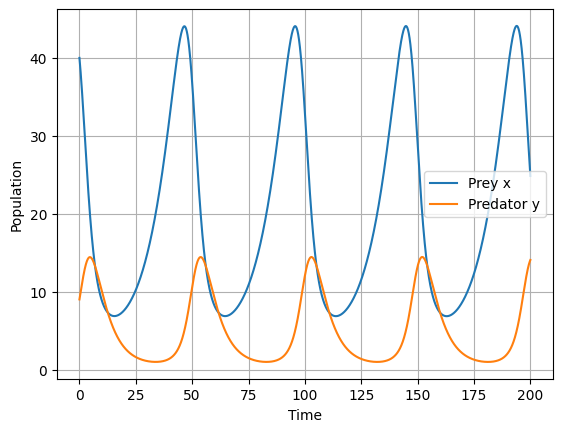

In [7]:
# 초기 조건과 파라미터 설정
x0 = 40      # 초기 피식자 수 (토끼)
y0 = 9       # 초기 포식자 수 (여우)
alpha = 0.1     # 피식자 번식
beta = 0.02     # 포식자로 인한 피식자의 죽음
delta = 0.01    # 피식자로 인한 포식자의 증가
gamma = 0.2     # 포식자 자연사

# 시뮬레이션 설정
dt = 0.001
t_max = 200
steps = int(t_max / dt)

# 결과 저장 배열
x = np.zeros(steps)
y = np.zeros(steps)
t = np.linspace(0, t_max, steps)

# 초기값 저장
x[0], y[0] = x0, y0

# Euler 방법으로 수치 해 계산
for i in range(steps - 1):
    dxdt = alpha * x[i] - beta * x[i] * y[i]
    dydt = delta * x[i] * y[i] - gamma * y[i]
    x[i+1] = x[i] + dxdt * dt
    y[i+1] = y[i] + dydt * dt

# 그래프 그리기
plt.figure()
plt.plot(t, x, label='Prey x')
plt.plot(t, y, label='Predator y')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

/tmp/ipython-input-8-1509933212.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


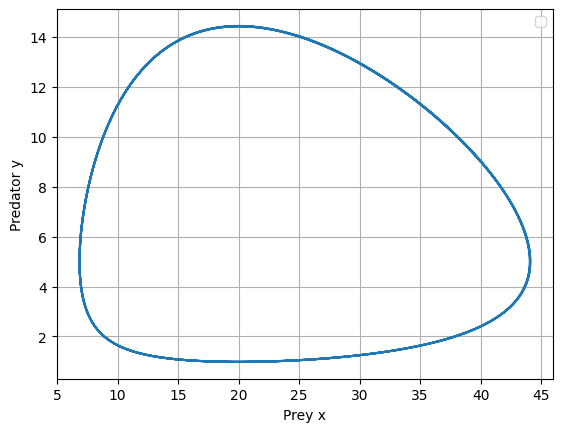

In [8]:
plt.figure()
plt.plot(x, y)
plt.xlabel('Prey x')
plt.ylabel('Predator y')
plt.legend()
plt.grid()
plt.show()

**실습2**: 모델의 파라미터를 변경하면 그래프가 어떻게 될까?